<a href="https://colab.research.google.com/github/llu13701/cm1_python_test/blob/main/CM1_DevQuickTest_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Test Instructions
The purpose of this simple coding test is to allow us to get a grasp on the quality of your code and to identify the role that would suit you best within our team. You don't NEED to be able to answer all of the items, but the ones that you do answer need to be correct. Feel free to use Google or any other tools that you prefer to complete these tasks.

Install any needed third-party libraries below this block. Please install the minimum amount of libraries you need.

!pip install whatever_you_need

In [ ]:
# !pip3 install matplotlib 
# !pip3 install pandas
# !pip3 install discord
# !pip3 install nest_asyncio
!pip3 install openai

### Task 1 (Data manipulation / Visualization)
Download the file: https://drive.google.com/file/d/1R_M3xI3b_BqAN_xWLqJDneg273X_sok5/view?usp=sharing

In `message_data.csv` there's two columns, one corresponds to the unique id of someone sending a message and the other one to when they sent it.

Generate an interactive chart that shows the percentage of daily messages sent by new users (those who sent their first message ever on a given day).

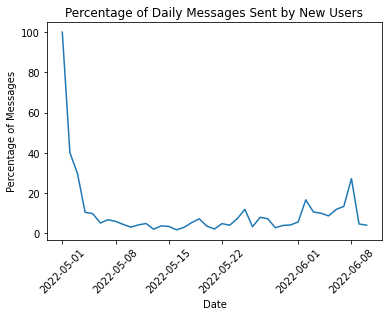

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('message_data.csv')

# Convert message_time column to datetime
df['message_time'] = pd.to_datetime(df['message_time'])

# Identify the first message sent by each unique author_id
first_messages = df.groupby('author_id')['message_time'].min().reset_index()

# Count the number of new users sending messages each day
new_users_per_day = first_messages.groupby(first_messages['message_time'].dt.date).size().reset_index(name='count')

# Calculate the total messages sent each day
total_messages_per_day = df['message_time'].dt.date.value_counts().reset_index().rename(columns={'index': 'date', 'message_time': 'total_messages'})

# Merge the two dataframes on the date column
combined_data = pd.merge(new_users_per_day, total_messages_per_day, left_on='message_time', right_on='date', how='inner')

# Calculate the percentage of new users' messages for each day
combined_data['percentage'] = (combined_data['count'] / combined_data['total_messages']) * 100

# Generate the interactive chart
plt.plot(combined_data['date'], combined_data['percentage'])
plt.xlabel('Date')
plt.ylabel('Percentage of Messages')
plt.title('Percentage of Daily Messages Sent by New Users')
plt.xticks(rotation=45)
plt.show()

### Task 2 (Django)
**To take the django portion of this test go to: https://github.com/llu13701/cm1_python_test and follow the instructions.**

### Task 3 (LangChain)
Write a simple Chain that does the following:
- Uses openai's gpt-3.5-turbo model.
- Remembers the last 2 message exchanges, as well as the system message.
- Greets people and tells a joke about their name.

In [1]:
import openai
from collections import deque

openai.api_key = "Your_key"

last_messages = deque()
name = input("Welcome! Please tell me your name!")


message_type = input("Please enter if you want to input a system or a regular message by saying `system` or `regular`: ")


while message_type != 'regular' or message_type != 'system':
    print("You entered an incorrect value! Please try again!")
    message_type = input("Please Enter if you want to input a system or a regular message by saying `system` or `regular`: ")

if message_type == 'system':
    message_type = input("Please enter which role you want: system or user?")
    while message_type == 'system':
        print("You entered an incorrect value! Please try again!")
        message_type = input("Please enter which role you want: system or user?")

message = input("Please enter your prompt or message: ")

if message_type == "system":
    message = [
        {'role': message_type, "content": message}
    ]

def send_request(message):
    if type(message) == list:

        response = openai.Completion.create(
            model = "gpt-3.5-turbo",
            messages = message
        )
    else:
        response = openai.Completion.create(
            model = "gpt-3.5-turbo",
            prompt = message
        )
    return response

if len(last_messages) == 2:
    last_messages.popleft()

last_messages.append([message_type, message])

gpt_response = send_request(message)

print(gpt_response)




### Notes:
1. Enter your name when you run the code to get the joke.
2. I have added functionalities like getting previous messages, sending system or user messages by typing what you want in the input, if you give wrong input it will keep asking for the right input.
3. To exit just type stop.
4. I have implemented the messaging service using a queue as we can pop the oldest messages in O(1).
5. You can get both just the 1st message, which is the oldest, or both messages, if you input wrong value it will keep on asking for you to input the right value.
6. You can also have conversation about anything as long as the model is allowed to talk about it and not only about the joke.

### Task 4 (Discord API)

Write a very simple discord bot that says "Hello {user_name}!" to every new incoming message in a discord server.


In [ ]:
import discord
import nest_asyncio

nest_asyncio.apply()
async def send_message(message, is_private):
    try:
        response = 'Hello ' + str(message.author)
        await message.author.send(response) if is_private else await message.channel.send(response)
    except Exception as e:
        print("Something went wrong! Please try again later!")

def run_bot():
    Token = "Your_Token_Here"
    intents = discord.Intents.default()
    intents.message_content = True
    client = discord.Client(intents=intents)

    @client.event
    async def on_ready():
        print(f'{client.user} is now running!')
    
    @client.event
    async def on_message(message):
        if message.author == client.user:
            return

        user_message = str(message.content)
        
        if user_message[0] == '?':
            user_message = user_message[1:]
            await send_message(message, True)
        else:
            await send_message(message, False)

    client.run(Token)

run_bot()



### Notes:
1. Use the link below to invite the bot into your server(s).
   [Invite Link](https://discord.com/api/oauth2/authorize?client_id=1129075257093935177&permissions=68719552512&scope=bot)
2. Whatever you say the server will just reply with "hello your username".
3. I have also added a small feature where if you type "?" and then you message, for example "?hello" the bot will message you directly instead of on the server.

### Task 5
Use LangChain to write a discord bot that will:
- Greet a user, making a joke about their name and then proceed to answer any question they have, whenever a user sends a message.
- Use async with langchain chain calls.
